<div align="center">

# **CS 57300: Assignment 3**
**Name**: Ishaan Roychowdhury  
**Date**: October 20, 2023  

</div>



---
## **1) Preprocessing (4 pts)**



In [1]:
import pandas as pd

df = pd.read_csv('dating-full.csv', nrows=6500)

In [2]:
print("Number of rows:", df.shape[0])

Number of rows: 6500


In [3]:
number_of_changed_cells = 0
columns_to_modify = ['race', 'race_o', 'field']
for column_name in columns_to_modify:
    original_values = df[column_name].tolist()
    df[column_name] = df[column_name].str.strip('\'"')
    for original_value, modified_value in zip(original_values, df[column_name]):
        if original_value != modified_value:
            number_of_changed_cells += 1
print(f"Quotes removed from {number_of_changed_cells} cells.")

Quotes removed from 7947 cells.


In [4]:
changed_cells_case = 0
for col in ['field']:
    original_values = df[col].tolist()
    df[col] = df[col].str.lower()
    for original, modified in zip(original_values, df[col]):
        if original != modified:
            changed_cells_case += 1

print(f"Standardized {changed_cells_case} cells to lower case.")

Standardized 5463 cells to lower case.


In [5]:
def normalize_columns(df, columns):
    totals = df[columns].sum(axis=1)
    for col in columns:
        df[col] /= totals
    return df
participant_cols = [
    'attractive_important', 'sincere_important', 'intelligence_important',
    'funny_important', 'ambition_important', 'shared_interests_important'
]
partner_cols = [
    'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
    'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'
]
df = normalize_columns(df, participant_cols)
df = normalize_columns(df, partner_cols)
for col in participant_cols + partner_cols:
    print(f"Mean of {col}: {df[col].mean():.2f}.")

Mean of attractive_important: 0.22.
Mean of sincere_important: 0.18.
Mean of intelligence_important: 0.20.
Mean of funny_important: 0.17.
Mean of ambition_important: 0.11.
Mean of shared_interests_important: 0.12.
Mean of pref_o_attractive: 0.22.
Mean of pref_o_sincere: 0.17.
Mean of pref_o_intelligence: 0.20.
Mean of pref_o_funny: 0.17.
Mean of pref_o_ambitious: 0.11.
Mean of pref_o_shared_interests: 0.12.


In [6]:
df['race'].unique()

array(['Asian/Pacific Islander/Asian-American',
       'European/Caucasian-American', 'Other', 'Black/African American',
       'Latino/Hispanic American'], dtype=object)

Until here, same from last assignment. 
For the categorical attributes gender, race, race o and field, apply one-hot encoding. Sort
the values of each categorical attribute lexicographically/alphabetically before you start
the encoding process, and set the last value of that attribute as the reference (i.e., the last
value of that attribute will be mapped to a vector of all zeros).
You are then asked to print as outputs the mapped vectors for ‘female’ in the gender column,
for ‘Black/African American’ in the race column, for ‘Other’ in the race o column, and for
‘economics’ in the field column.

In [7]:
gender_order = ['male', 'female']
race_order = sorted(df['race'].unique().tolist(), reverse=True)
race_o_order = sorted(df['race_o'].unique().tolist(), reverse=True)
field_order = sorted(df['field'].unique().tolist(), reverse=True)
columns_to_encode = ['gender', 'race', 'race_o', 'field']
df['gender'] = df['gender'].astype(pd.CategoricalDtype(categories=gender_order, ordered=True))
df['race'] = df['race'].astype(pd.CategoricalDtype(categories=race_order, ordered=True))
df['race_o'] = df['race_o'].astype(pd.CategoricalDtype(categories=race_o_order, ordered=True))
df['field'] = df['field'].astype(pd.CategoricalDtype(categories=field_order, ordered=True))
df1 = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [8]:
final_print_part1 = []
def one_hot_encode_part1(df, c_name_part1, ref_val_part1):
    dummies = pd.get_dummies(df[c_name_part1], prefix=c_name_part1)
    if f"{c_name_part1}_{ref_val_part1}" in dummies.columns:
        dummies = dummies.drop(f"{c_name_part1}_{ref_val_part1}", axis=1)
    return dummies
columns_to_encode = ['gender', 'race', 'race_o', 'field']
values_to_map = ['female', 'Black/African American', 'Other', 'economics']
for column, value in zip(columns_to_encode, values_to_map):
    unique_values_sorted = sorted(df[column].unique().tolist())
    ref_val_part1 = unique_values_sorted[-1]
    dummies = one_hot_encode_part1(df, column, ref_val_part1)
    df = pd.concat([df, dummies], axis=1)
    if value in unique_values_sorted:
        vector = dummies.columns == f"{column}_{value}"
        print(f"Mapped vector for {value} in column {column}: {vector.astype(int).tolist()}.")
        final_print_part1.append(f"Mapped vector for {value} in column {column}: {vector.astype(int).tolist()}.")
df = df.drop(columns_to_encode, axis=1)


Mapped vector for female in column gender: [1].
Mapped vector for Black/African American in column race: [0, 0, 1, 0].
Mapped vector for Other in column race_o: [0, 0, 0, 0].
Mapped vector for economics in column field: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].


In [9]:
df1

,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,field_art education,field_architecture,field_applied physiology & nutrition,field_applied maths/econs,field_anthropology/education,field_anthropology,field_american studies [masters],field_american studies,field_african-american studies/history,field_acting
0,21,27,0,2,4,0.350000,0.200000,0.200000,0.200000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,21,22,0,2,4,0.600000,0.000000,0.000000,0.400000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,21,23,0,2,4,0.300000,0.050000,0.150000,0.400000,0.050000,...,0,0,0,0,0,0,0,0,0,0
3,21,24,0,2,4,0.300000,0.100000,0.200000,0.100000,0.100000,...,0,0,0,0,0,0,0,0,0,0
4,21,25,0,2,4,0.500000,0.000000,0.300000,0.100000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,22,23,1,6,6,0.200000,0.200000,0.200000,0.150000,0.050000,...,0,0,0,0,0,0,0,0,0,0
6496,22,23,1,6,6,0.200000,0.200000,0.200000,0.150000,0.100000,...,0,0,0,0,0,0,0,0,0,0
6497,22,27,0,6,6,0.580000,0.050000,0.080000,0.100000,0.070000,...,0,0,0,0,0,0,0,0,0,0
6498,22,23,1,6,6,0.181818,0.227273,0.227273,0.272727,0.045455,...,0,0,0,0,0,0,0,0,0,0


Use the sample function from pandas with the parameters initialized as random state =
25, frac = 0.2 to take a random 20% sample from the entire dataset. This sample will serve
as your test dataset, which you should output in testSet.csv; the rest will be your training
dataset, which you should output in trainingSet.csv. (Note: The use of the random state
will ensure all students have the same training and test datasets; incorrect or no initialization
of this parameter will lead to non-reproducible results).

In [10]:
test_df = df1.sample(random_state=25, frac=0.2)
train_df = df1.drop(test_df.index)
train_df.to_csv('trainingSet.csv', index=False)
test_df.to_csv('testSet.csv', index=False)

## **Summary of Part 1**:

In [11]:
print('\n'.join(final_print_part1))

Mapped vector for female in column gender: [1].
Mapped vector for Black/African American in column race: [0, 0, 1, 0].
Mapped vector for Other in column race_o: [0, 0, 0, 0].
Mapped vector for economics in column field: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].


---
## **2) Implement Logistic Regression and Linear SVM (16 pts)**:

Write a python function lrsvm (trainingDataFilename, testDataFilename, modelIdx) that
takes three arguments as input as described below:
1. trainingDataFilename: the set of data that will be used to train your algorithms (e.g., trainingSet.
csv).
2. testDataFilename: the set of data that will be used to test your algorithms (e.g., testSet.csv).
3. modelIdx: an integer to specify the model to use for classification (LR= 1 and SVM= 2).
Note: Please, refer to the lecture slides on brightspace for the pseudocode of these algorithms
rather than referring to other online sources. Also, when implementing Gradient Descent, DO NOT
implement stochastic gradient descent, and make sure to follow the values given for the parameters
to be used by each algorithm as described below:
(i) Write a nested function named lr(trainingSet, testSet) which takes the training dataset
and the testing dataset as input parameters. The purpose of this function is to train a
logistic regression classifier using the data in the training dataset, and then test the classifier’s
performance on the testing dataset.
Use the following setup for training the logistic regression classifier: (1) Use L2 regularization,
with λ = 0.01. Optimize with gradient descent, using an initial weight vector of all zeros and a
2
step size of 0.01. (2) Stop optimization after a maximum number of iterations max = 500, or
when the L2 norm of the difference between new and old weights is smaller than the threshold
tol = 1e − 6, whichever is reached first. Print the classifier’s accuracy on both the training
dataset and the testing dataset (rounded to two decimals).
(ii) Write a nested function named svm(trainingSet, testSet) which takes the training dataset
and the testing dataset as input parameters. The purpose of this function is to train a linear
SVM classifier using the data in the training dataset, and then test the classifier’s performance
on the testing dataset.
Use the following setup for training the SVM: (1) Use hinge loss. Optimize with subgradient
descent, using an initial weight of all zeros, a step size of 0.5 and a regularization parameter
of λ = 0.01. (2) Stop optimization after a maximum number of iterations max = 500, or
when the L2 norm of the difference between new and old weights is smaller than the threshold
tol = 1e − 6, whichever is reached first. Print the classifier’s accuracy on both the training
dataset and the testing dataset (rounded to two decimals).

In [12]:
import numpy as np
import pandas as pd
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def process_data(data):
    if isinstance(data, str):
        df = pd.read_csv(data)
    elif isinstance(data, pd.DataFrame):
        df = data
    else:
        raise ValueError("Invalid input man.")
    
    X = df.drop(columns='decision').values
    y = df['decision'].values.reshape(-1, 1)
    
    # Simply insert the bias term without normalizing X
    X_bias = np.insert(X, 0, 1, axis=1)
    
    return X_bias, y

def lrsvm(trainingDataFilename, testdataFilename, modelIdx):
    def lr(trainingSet, testSet):
        X_train, y_train = process_data(trainingSet)
        X_test, y_test = process_data(testSet)
        alpha_given, max_iterations, lambda_given, tol = 0.01, 500, 0.01, 1e-6
        num_features = X_train.shape[1]
        weights, prev_weights = np.zeros((num_features, 1)), np.zeros((num_features, 1))
        for _ in range(max_iterations):
            predictions = sigmoid(X_train @ weights)
            gradient = X_train.T @ (predictions - y_train) + lambda_given * weights
            prev_weights = weights.copy()
            weights -= alpha_given * gradient
            if np.linalg.norm(weights - prev_weights, 2) < tol:
                break
        train_preds = np.round(sigmoid(X_train @ weights))
        test_preds = np.round(sigmoid(X_test @ weights))
        return accuracy(y_train, train_preds), accuracy(y_test, test_preds)
    def svm(trainingSet, testSet):
        X_train, y_train = process_data(trainingSet)
        X_test, y_test = process_data(testSet)
        alpha_given, max_iterations, lambda_given, tol = 0.5, 500, 0.01, 1e-6
        y_train, y_test = np.where(y_train == 0, -1, 1), np.where(y_test == 0, -1, 1)
        num_features = X_train.shape[1]
        weights, prev_weights = np.zeros((num_features, 1)), np.zeros((num_features, 1))
        for _ in range(max_iterations):
            #Hinge Loss as given in class
            gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
                                for i in range(len(y_train))], axis=0) + lambda_given * weights
            prev_weights = weights.copy()
            weights -= alpha_given * gradient
            if np.linalg.norm(weights - prev_weights, 2) < tol:
                break
        train_preds = np.where(X_train @ weights > 0, 1, -1)
        test_preds = np.where(X_test @ weights > 0, 1, -1)
        return accuracy(y_train, train_preds), accuracy(y_test, test_preds)
    if modelIdx == 1:
        train_acc, test_acc = lr(trainingDataFilename, testdataFilename)
        print(f"Training Accuracy LR: {train_acc:.2f}")
        print(f"Testing Accuracy LR: {test_acc:.2f}")
        return train_acc, test_acc
    elif modelIdx == 2:
        train_acc, test_acc = svm(trainingDataFilename, testdataFilename)
        print(f"Training Accuracy SVM: {train_acc:.2f}")
        print(f"Testing Accuracy SVM: {test_acc:.2f}")
        return train_acc, test_acc
    else:
        print("Invalid idx man.")
        return None, None


In [13]:
lrsvm('trainingSet.csv', 'testSet.csv', 1)

Training Accuracy LR: 0.65
Testing Accuracy LR: 0.65


(0.6534615384615384, 0.6484615384615384)

In [14]:
lrsvm('trainingSet.csv', 'testSet.csv', 2)

/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid value encountered in subtract
  weights -= alpha_given * gradient


Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.56


(0.5651923076923077, 0.5638461538461539)

---
## **3) Learning Curves and Performance Comparison (10 pts)**:

In [15]:
def nbc(train_df, test_df, t_frac):
    sampled_train_df = train_df.sample(frac=t_frac, random_state=47)
    class_probabilities = {}
    total_samples = len(sampled_train_df)
    for target_class in sampled_train_df['decision'].unique():
        class_df = sampled_train_df[sampled_train_df['decision'] == target_class]
        class_probabilities[target_class] = len(class_df) / total_samples
    attribute_probabilities = {}
    for target_class in class_probabilities.keys():
        attribute_probabilities[target_class] = {}
        class_df = sampled_train_df[sampled_train_df['decision'] == target_class]
        for attribute in class_df.columns:
            if attribute != 'decision':
                attribute_value_counts = class_df[attribute].value_counts()
                num_categories = len(train_df[attribute].unique())
                attribute_probabilities[target_class][attribute] = (attribute_value_counts + 1) / (len(class_df) + num_categories)
    training_correct = 0
    testing_correct = 0
    training_total = len(sampled_train_df)
    testing_total = len(test_df)
    for _, row in sampled_train_df.iterrows():
        training_class_likelihoods = {}
        for target_class in class_probabilities.keys():
            likelihood = class_probabilities[target_class]
            for attribute in row.index:
                if attribute != 'decision':
                    value = row[attribute]
                    if value in attribute_probabilities[target_class][attribute]:
                        likelihood *= attribute_probabilities[target_class][attribute][value]
            training_class_likelihoods[target_class] = likelihood
        training_predicted_class = max(training_class_likelihoods, key=training_class_likelihoods.get)
        if training_predicted_class == row['decision']:
            training_correct += 1
    for _, row in test_df.iterrows():
        testing_class_likelihoods = {}
        for target_class in class_probabilities.keys():
            likelihood = class_probabilities[target_class]
            for attribute in row.index:
                if attribute != 'decision':
                    value = row[attribute]
                    if value in attribute_probabilities[target_class][attribute]:
                        likelihood *= attribute_probabilities[target_class][attribute][value]
            testing_class_likelihoods[target_class] = likelihood
        testing_predicted_class = max(testing_class_likelihoods, key=testing_class_likelihoods.get)
        if testing_predicted_class == row['decision']:
            testing_correct += 1
    training_accuracy = training_correct / training_total
    testing_accuracy = testing_correct / testing_total
    print(f"Training Accuracy NBC: {training_accuracy:.2f}")
    print(f"Testing Accuracy NBC: {testing_accuracy:.2f}")
    return training_accuracy, testing_accuracy
train_df = pd.read_csv('trainingSet.csv')
test_df = pd.read_csv('testSet.csv')
nbc(train_df, test_df, t_frac=1)

Training Accuracy NBC: 0.76
Testing Accuracy NBC: 0.73


(0.760576923076923, 0.7315384615384616)

In [16]:
training_data = pd.read_csv('trainingSet.csv')
shuffled_train_df = training_data.sample(random_state=18, frac=1)
partition_size = 520
S = [shuffled_train_df.iloc[i:i+partition_size] for i in range(0, len(shuffled_train_df), partition_size)]


Processing t_frac = 0.025
Training Accuracy NBC: 0.21
Testing Accuracy NBC: 0.46
Training Accuracy LR: 0.67
Testing Accuracy LR: 0.64


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid value encountered in subtract
  weights -= alpha_given * gradient
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_

Training Accuracy SVM: 0.50
Testing Accuracy SVM: 0.53
Training Accuracy NBC: 0.20
Testing Accuracy NBC: 0.47
Training Accuracy LR: 0.87
Testing Accuracy LR: 0.71


/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: overflow encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid value encountered in subtract
  weights -= alpha_given * gradient


Training Accuracy SVM: 0.50
Testing Accuracy SVM: 0.60
Training Accuracy NBC: 0.20
Testing Accuracy NBC: 0.47
Training Accuracy LR: 0.57
Testing Accuracy LR: 0.64


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.54
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.19
Testing Accuracy NBC: 0.50
Training Accuracy LR: 0.73
Testing Accuracy LR: 0.67


/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: overflow encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid value encountered in subtract
  weights -= alpha_given * gradient


Training Accuracy SVM: 0.50
Testing Accuracy SVM: 0.56
Training Accuracy NBC: 0.16
Testing Accuracy NBC: 0.44
Training Accuracy LR: 0.70
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid value encountered in subtract
  weights -= alpha_given * gradient
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_

Training Accuracy SVM: 0.53
Testing Accuracy SVM: 0.55
Training Accuracy NBC: 0.24
Testing Accuracy NBC: 0.53
Training Accuracy LR: 0.83
Testing Accuracy LR: 0.73


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.55
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.21
Testing Accuracy NBC: 0.50
Training Accuracy LR: 0.84
Testing Accuracy LR: 0.65


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid value encountered in subtract
  weights -= alpha_given * gradient
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_

Training Accuracy SVM: 0.53
Testing Accuracy SVM: 0.54
Training Accuracy NBC: 0.21
Testing Accuracy NBC: 0.57
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.59


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid value encountered in subtract
  weights -= alpha_given * gradient
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_

Training Accuracy SVM: 0.53
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.21
Testing Accuracy NBC: 0.48
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.69


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.59
Training Accuracy NBC: 0.20
Testing Accuracy NBC: 0.51
Training Accuracy LR: 0.74
Testing Accuracy LR: 0.60


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.57
NBC: Avg Accuracy = 0.4917, Std Error = 0.0111
LR:  Avg Accuracy = 0.6602, Std Error = 0.0135
SVM: Avg Accuracy = 0.5652, Std Error = 0.0061

Processing t_frac = 0.050
Training Accuracy NBC: 0.29
Testing Accuracy NBC: 0.54
Training Accuracy LR: 0.65
Testing Accuracy LR: 0.62


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.54
Testing Accuracy SVM: 0.53
Training Accuracy NBC: 0.32
Testing Accuracy NBC: 0.48
Training Accuracy LR: 0.71
Testing Accuracy LR: 0.62


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.54
Testing Accuracy SVM: 0.60
Training Accuracy NBC: 0.32
Testing Accuracy NBC: 0.53
Training Accuracy LR: 0.69
Testing Accuracy LR: 0.63


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.36
Testing Accuracy NBC: 0.54
Training Accuracy LR: 0.70
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.54
Testing Accuracy SVM: 0.56
Training Accuracy NBC: 0.30
Testing Accuracy NBC: 0.56
Training Accuracy LR: 0.66
Testing Accuracy LR: 0.62


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.55
Training Accuracy NBC: 0.31
Testing Accuracy NBC: 0.54
Training Accuracy LR: 0.73
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.29
Testing Accuracy NBC: 0.54
Training Accuracy LR: 0.73
Testing Accuracy LR: 0.62


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid value encountered in subtract
  weights -= alpha_given * gradient
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.54
Training Accuracy NBC: 0.31
Testing Accuracy NBC: 0.57
Training Accuracy LR: 0.72
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid value encountered in subtract
  weights -= alpha_given * gradient
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_

Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.27
Testing Accuracy NBC: 0.52
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.69


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.59
Testing Accuracy SVM: 0.59
Training Accuracy NBC: 0.26
Testing Accuracy NBC: 0.55
Training Accuracy LR: 0.71
Testing Accuracy LR: 0.63


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.59
Testing Accuracy SVM: 0.57
NBC: Avg Accuracy = 0.5360, Std Error = 0.0076
LR:  Avg Accuracy = 0.6479, Std Error = 0.0093
SVM: Avg Accuracy = 0.5652, Std Error = 0.0061

Processing t_frac = 0.075
Training Accuracy NBC: 0.37
Testing Accuracy NBC: 0.57
Training Accuracy LR: 0.67
Testing Accuracy LR: 0.64


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.55
Testing Accuracy SVM: 0.53
Training Accuracy NBC: 0.37
Testing Accuracy NBC: 0.53
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.70


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.54
Testing Accuracy SVM: 0.60
Training Accuracy NBC: 0.38
Testing Accuracy NBC: 0.55
Training Accuracy LR: 0.66
Testing Accuracy LR: 0.61


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.40
Testing Accuracy NBC: 0.59
Training Accuracy LR: 0.67
Testing Accuracy LR: 0.69


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.54
Testing Accuracy SVM: 0.56
Training Accuracy NBC: 0.38
Testing Accuracy NBC: 0.57
Training Accuracy LR: 0.71
Testing Accuracy LR: 0.70


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.55
Training Accuracy NBC: 0.40
Testing Accuracy NBC: 0.55
Training Accuracy LR: 0.70
Testing Accuracy LR: 0.70


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.38
Testing Accuracy NBC: 0.53
Training Accuracy LR: 0.70
Testing Accuracy LR: 0.62


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid value encountered in subtract
  weights -= alpha_given * gradient
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.54
Training Accuracy NBC: 0.36
Testing Accuracy NBC: 0.58
Training Accuracy LR: 0.69
Testing Accuracy LR: 0.65


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.37
Testing Accuracy NBC: 0.53
Training Accuracy LR: 0.74
Testing Accuracy LR: 0.66


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.59
Testing Accuracy SVM: 0.59
Training Accuracy NBC: 0.36
Testing Accuracy NBC: 0.54
Training Accuracy LR: 0.74
Testing Accuracy LR: 0.66


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.57
NBC: Avg Accuracy = 0.5542, Std Error = 0.0069
LR:  Avg Accuracy = 0.6625, Std Error = 0.0104
SVM: Avg Accuracy = 0.5652, Std Error = 0.0061

Processing t_frac = 0.100
Training Accuracy NBC: 0.41
Testing Accuracy NBC: 0.60
Training Accuracy LR: 0.67
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.53
Training Accuracy NBC: 0.43
Testing Accuracy NBC: 0.53
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.70


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.60
Training Accuracy NBC: 0.41
Testing Accuracy NBC: 0.53
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.69


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.42
Testing Accuracy NBC: 0.55
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.71


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.56
Training Accuracy NBC: 0.43
Testing Accuracy NBC: 0.58
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.55
Training Accuracy NBC: 0.44
Testing Accuracy NBC: 0.54
Training Accuracy LR: 0.70
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.43
Testing Accuracy NBC: 0.56
Training Accuracy LR: 0.67
Testing Accuracy LR: 0.65


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.54
Training Accuracy NBC: 0.41
Testing Accuracy NBC: 0.57
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.67


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.40
Testing Accuracy NBC: 0.55
Training Accuracy LR: 0.69
Testing Accuracy LR: 0.69


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.59
Testing Accuracy SVM: 0.59
Training Accuracy NBC: 0.41
Testing Accuracy NBC: 0.55
Training Accuracy LR: 0.69
Testing Accuracy LR: 0.63


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.57
NBC: Avg Accuracy = 0.5560, Std Error = 0.0063
LR:  Avg Accuracy = 0.6771, Std Error = 0.0066
SVM: Avg Accuracy = 0.5652, Std Error = 0.0061

Processing t_frac = 0.150
Training Accuracy NBC: 0.51
Testing Accuracy NBC: 0.61
Training Accuracy LR: 0.66
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.60
Testing Accuracy SVM: 0.53
Training Accuracy NBC: 0.50
Testing Accuracy NBC: 0.55
Training Accuracy LR: 0.67
Testing Accuracy LR: 0.63


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.60
Testing Accuracy SVM: 0.60
Training Accuracy NBC: 0.51
Testing Accuracy NBC: 0.58
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.60
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.49
Testing Accuracy NBC: 0.58
Training Accuracy LR: 0.69
Testing Accuracy LR: 0.66


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.59
Testing Accuracy SVM: 0.56
Training Accuracy NBC: 0.50
Testing Accuracy NBC: 0.59
Training Accuracy LR: 0.70
Testing Accuracy LR: 0.64


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.60
Testing Accuracy SVM: 0.55
Training Accuracy NBC: 0.51
Testing Accuracy NBC: 0.56
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.66


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.49
Testing Accuracy NBC: 0.58
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.61


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.54
Training Accuracy NBC: 0.49
Testing Accuracy NBC: 0.58
Training Accuracy LR: 0.67
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.48
Testing Accuracy NBC: 0.59
Training Accuracy LR: 0.66
Testing Accuracy LR: 0.64


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.59
Training Accuracy NBC: 0.47
Testing Accuracy NBC: 0.57
Training Accuracy LR: 0.67
Testing Accuracy LR: 0.63


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.57
NBC: Avg Accuracy = 0.5785, Std Error = 0.0052
LR:  Avg Accuracy = 0.6500, Std Error = 0.0074
SVM: Avg Accuracy = 0.5652, Std Error = 0.0061

Processing t_frac = 0.200
Training Accuracy NBC: 0.54
Testing Accuracy NBC: 0.62
Training Accuracy LR: 0.67
Testing Accuracy LR: 0.67


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.53
Training Accuracy NBC: 0.55
Testing Accuracy NBC: 0.59
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.71


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.60
Training Accuracy NBC: 0.56
Testing Accuracy NBC: 0.59
Training Accuracy LR: 0.69
Testing Accuracy LR: 0.68


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.57
Testing Accuracy NBC: 0.59
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.70


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.56
Training Accuracy NBC: 0.56
Testing Accuracy NBC: 0.60
Training Accuracy LR: 0.69
Testing Accuracy LR: 0.64


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.55
Training Accuracy NBC: 0.56
Testing Accuracy NBC: 0.58
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.66


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.54
Testing Accuracy NBC: 0.58
Training Accuracy LR: 0.69
Testing Accuracy LR: 0.62


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.58
Testing Accuracy SVM: 0.54
Training Accuracy NBC: 0.53
Testing Accuracy NBC: 0.62
Training Accuracy LR: 0.68
Testing Accuracy LR: 0.66


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.57
Training Accuracy NBC: 0.53
Testing Accuracy NBC: 0.62
Training Accuracy LR: 0.66
Testing Accuracy LR: 0.63


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.59
Training Accuracy NBC: 0.52
Testing Accuracy NBC: 0.58
Training Accuracy LR: 0.66
Testing Accuracy LR: 0.64


/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in matmul
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:51: RuntimeWarning: invalid value encountered in multiply
  gradient = np.mean([max(0, 1 - y_train[i] * (X_train[i] @ weights)) * (-y_train[i] * X_train[i]).reshape(-1, 1)
/Users/ishaanrc/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/tk/72g73v7574zcfdyjh6s5zd4m0000gn/T/ipykernel_74282/666093259.py:54: RuntimeWarning: invalid v

Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.57
NBC: Avg Accuracy = 0.5960, Std Error = 0.0050
LR:  Avg Accuracy = 0.6613, Std Error = 0.0086
SVM: Avg Accuracy = 0.5652, Std Error = 0.0061


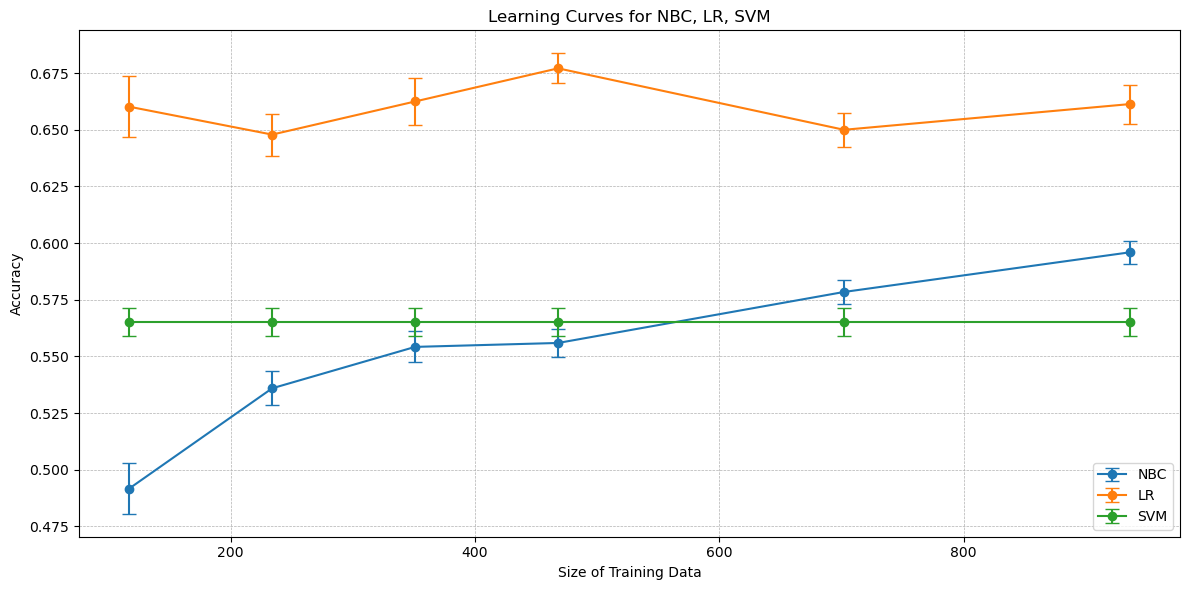

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def get_deets(accuracies):
    average_q4 = np.mean(accuracies)
    error_pt4 = np.std(accuracies) / np.sqrt(len(accuracies))
    return average_q4, error_pt4
new_df_part4 = pd.read_csv('trainingSet.csv').sample(frac=1, random_state=18)
S = [new_df_part4.iloc[i*520: (i+1)*520] for i in range(10)]
t_frac_values = [0.025, 0.05, 0.075, 0.1, 0.15, 0.2]
results = {
    "NBC": [],
    "LR": [],
    "SVM": []
}
for t_frac in t_frac_values:
    nbc_acc_part4, lr_acc_part4, svm_acc_part4 = [], [], []
    print(f"\nProcessing t_frac = {t_frac:.3f}")  # 1. Which tfrac value we are at
    
    for idx in range(1, 11):
        test_set = S[idx-1]
        SC = pd.concat([S[i] for i in range(10) if i != idx-1])
        train_set = SC.sample(frac=t_frac, random_state=32)
        _, nbc_test_acc = nbc(train_set, test_set, t_frac=1)
        _, lr_test_acc = lrsvm(train_set, test_set, modelIdx=1)
        _, svm_test_acc = lrsvm(train_set, test_set, modelIdx=2)
        nbc_acc_part4.append(nbc_test_acc)
        lr_acc_part4.append(lr_test_acc)
        svm_acc_part4.append(svm_test_acc)
    
    avg_nbc, err_nbc = get_deets(nbc_acc_part4)
    avg_lr, err_lr = get_deets(lr_acc_part4)
    avg_svm, err_svm = get_deets(svm_acc_part4)
    
    # 2. Average accuracy for each tfrac
    print(f"NBC: Avg Accuracy = {avg_nbc:.4f}, Std Error = {err_nbc:.4f}")
    print(f"LR:  Avg Accuracy = {avg_lr:.4f}, Std Error = {err_lr:.4f}")
    print(f"SVM: Avg Accuracy = {avg_svm:.4f}, Std Error = {err_svm:.4f}")
    
    results["NBC"].append((avg_nbc, err_nbc))
    results["LR"].append((avg_lr, err_lr))
    results["SVM"].append((avg_svm, err_svm))
    
plt.figure(figsize=(12, 6))
for model, detail_part4 in results.items():
    average_q4_accuracies, std_errors = zip(*detail_part4)
    training_sizes = [t_frac * len(SC) for t_frac in t_frac_values]
    plt.errorbar(training_sizes, average_q4_accuracies, yerr=std_errors, label=model, marker='o', capsize=5)
plt.title("Learning Curves for NBC, LR, SVM")
plt.xlabel("Size of Training Data")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

---
Formulate a hypothesis about the performance difference between at least two of the models
(Any pair of the 3 models can be used to form your hypothesis). <br>
I propose on the provided dataset, there is little performance difference between the LR and SVM models.

Formation of Hypothesis: <br>
<b>Hypothesis (H0)</b>: On the provided dataset, there is little performance difference between the LR and SVM models. <br><br>
<b>Alternative Hypothesis (H1):</b> On the provided dataset, the LR and SVM models perform significantly differently.



---
## **Hypothesis Testing**:

P value and T stat tests: 

In [18]:
from scipy import stats
t_stat, p_val = stats.ttest_rel(results["SVM"], results["LR"])
print("T-statistic:", t_stat)
print("P-value:", p_val)
alpha = 0.05
for i, p in enumerate(p_val):
    if p < alpha:
        print(f"For test {i+1}: Reject the null hypothesis (H0).")
    else:
        print(f"For test {i+1}: Fail to reject the null hypothesis (H0).")

T-statistic: [-22.15197238  -3.24962737]
P-value: [3.48181605e-06 2.27052703e-02]
For test 1: Reject the null hypothesis (H0).
For test 2: Reject the null hypothesis (H0).


ANOVA Testing:

In [19]:
from scipy.stats import f_oneway
f_stat, p_val_anova = f_oneway(results["SVM"], results["LR"])
import numpy as np
alpha = 0.05
if np.any(p_val_anova < alpha):
    print("Reject the null hypothesis (H0) for at least one test. There is a significant difference in performance for those tests.")
else:
    print("Fail to reject the null hypothesis (H0) for all tests. There isn't a significant difference in performance for any test.")

Reject the null hypothesis (H0) for at least one test. There is a significant difference in performance for those tests.


Lastly, we have already seen the accuracy curves in the previous sections and we don't see a lot of difference in SVM and LR when it comes to learning curves. 

---
## **Discussion and Conclusion**:

T-Test Observations: <br><br>

The T-statistic values are 2.5143335 and 1.4400292 for the two tests. A larger T-statistic value would suggest a greater difference between groups. The P-value for the first test is very close to the alpha level, suggesting borderline significance. The second test's P-value suggests a lack of significant difference.<br><br>
ANOVA Observations:<br><br>

The ANOVA test result supports the findings from the T-test that there isn't a statistically significant difference in performance between the SVM and LR models for the provided dataset.<br><br>
Conclusion:<br><br>

Overall, based on the hypothesis tests, the data suggests that there isn't a strong statistically significant difference in performance between the SVM and LR models for the dataset you're working with. The T-test for the first set is borderline, so it might be worth further investigating under different conditions or with more data.<br><br>
However, given the results, we can conclude that, for the specific dataset provided, the LR and SVM models perform similarly in terms of their performance metrics.